In [ ]:
# default_exp gram

# gram

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import bezier
from matplotlib.collections import LineCollection
from matplotlib import pyplot as plt
import numpy as np
from penkit import write, preview
from pathlib import Path
import seaborn as sns
from tqdm import tqdm

In [ ]:
%matplotlib inline

In [ ]:
#export
def dist_from_point(line, point):
    '''calculate euclidean distance of a set of points from a reference point'''
    return ((line - point) ** 2).sum(axis=1) ** 0.5

In [ ]:
#export
def lines_to_layer(lines):
    nanlines = []
    for line in lines:
        _line = np.concatenate([line,np.array([[np.nan, np.nan]])])
        nanlines.append(_line)
    nanlines = np.concatenate(nanlines)
    x = nanlines[:,0]
    y = nanlines[:,1]
    return (x,y)

In [ ]:
#export
def layer_to_lines(layer):
    _layer = layer[1:,:]  # drop first row containing placeholder nan
    isnan = np.isnan(_layer[:,0]).nonzero()[0]
    lines = []
    start_ind = 0
    for nan_ind in isnan:
        line = _layer[start_ind:nan_ind,:]
        lines.append(line)
        start_ind = nan_ind + 1
    return lines

In [ ]:
#export
class ChordArray(object):
    def __init__(self,
                 center=np.array([0.,0.]),
                 radius=1,
                ):
        self.center = center
        self.radius = radius
        self.chords = np.array([[np.nan, np.nan]])
        
    @property
    def center_x(self):
        return self.center[0]
    
    @property
    def center_y(self):
        return self.center[1]
    
    def radial_to_xy(self, r, theta):
        x = np.cos(theta) * r
        y = np.sin(theta) * r
        return (x, y)
    
    def gen_chord(self, theta0, theta1, radius0=None, radius1=None):
        if not radius0:
            radius0 = self.radius
        if not radius1:
            radius1 = self.radius
        x0, y0 = self.radial_to_xy(radius0, theta0)
        x1, y1 = self.radial_to_xy(radius1, theta1)
        chord = np.array([[x0, y0],
                             [x1, y1],
                             [np.nan, np.nan],
                            ])
        chord += self.center
        return chord
    
    def add_chord(self, theta0, theta1, radius0=None, radius1=None):
        chord = self.gen_chord(theta0, theta1, radius0, radius1)
        self.chords = np.append(self.chords, chord, axis=0)
    
    def gen_diameter(self, theta0, radius=None):
        if not radius:
            radius = self.radius
        theta1 = theta0 + np.pi
        return self.gen_chord(theta0=theta0,
                              theta1=theta1,
                              radius0=radius,
                              radius1=radius
                             )
        
    def add_diameter(self, theta0, radius=None):
        diameter = self.gen_diameter(theta0, radius)
        self.chords = np.append(self.chords, diameter, axis=0)
        
    def add_random_diameters(self, n_diameters=10):
        for theta in np.random.rand(n_diameters) * np.pi * 2:
            self.add_diameter(theta)
            
    def add_random_chords_at_set_theta_diff(self, n_chords, theta_diff):
        for theta0 in np.random.rand(n_chords) * np.pi * 2:
            theta1 = theta0 + theta_diff
            self.add_chord(theta0=theta0, theta1=theta1)
            

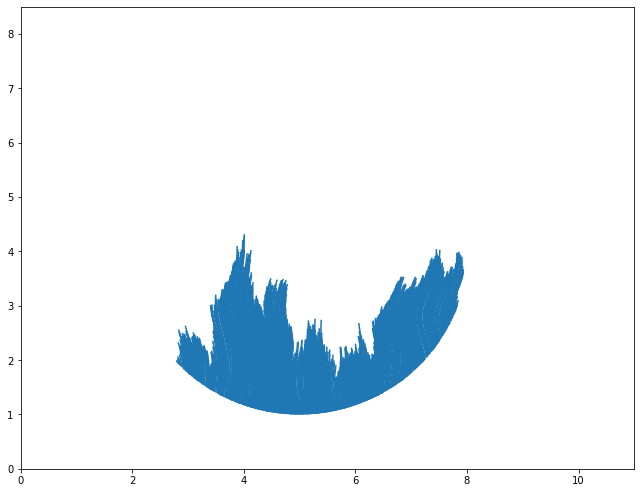

In [ ]:
lines = []

node_sets = []
n_lines = 1200
n_nodes_per_line = 20
y_start = 0.5
y_end = 5
x_start = 1
x_end = 10
node_x_centers = np.linspace(x_start, x_end, n_lines)
std_scale = 0.02
n_eval_points = 2000

### initialize vals
node_ys = np.linspace(y_start, y_end, n_nodes_per_line)
centered_node_xs = np.zeros(node_ys.shape)
bez_eval_end_center = 0.7
bez_eval_end_noise = 0
bez_eval_end_limit = 1.02
bez_eval_end_std_scale = 0.02

for i, node_x_center in enumerate(node_x_centers):
#     node_ys = np.flipud(node_ys)
#     centered_node_xs = np.flipud(centered_node_xs)
    new_x_noise = np.random.randn(n_nodes_per_line) * std_scale
    bez_eval_end_noise = bez_eval_end_noise + np.random.randn() * bez_eval_end_std_scale
    centered_node_xs = centered_node_xs + new_x_noise
    node_xs = node_x_center + centered_node_xs
    node_xs[0:3] = node_x_center
#     node_xs[-1] = node_x_center
    nodes = np.asfortranarray([
        node_xs,
        node_ys,
        ])
    curve = bezier.Curve(nodes, degree=(nodes.shape[1]-1))
    bez_eval_end = bez_eval_end_center + bez_eval_end_noise
    if bez_eval_end > bez_eval_end_limit:
        bez_eval_end = 1 + np.random.randn()*0.02
    eval_points = np.linspace(0, bez_eval_end, n_eval_points)
    x, y = curve.evaluate_multi(eval_points)
    if i % 2:
        x = np.flipud(x)
        y = np.flipud(y)
    lines.append(np.stack([x, y]).T)
    node_sets.append(np.stack([node_xs, node_ys]).T)

in_circle_lines = []
center_loc = np.array([5.,4])
circle_rad = 3
for line in lines:
    in_circle = dist_from_point(line, center_loc) < circle_rad
    in_circle_lines.append(line[in_circle,:])



    
    
lc = LineCollection(lines)
iclc = LineCollection(in_circle_lines)
ns = np.concatenate(node_sets)
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5))
ax.set_xlim((0, 11))
ax.set_ylim((0, 8.5))

# ax.add_collection(lc)
ax.add_collection(iclc)

In [ ]:
from nbdev.export import notebook2script
notebook2script()

Converted 00_wigglesphere.ipynb.
Converted 01_wigglesphere_scratch.ipynb.
Converted index.ipynb.
